# About

See what BERT is all about. This version is meant to run on our server.

replication of the following blog post:

### News Topic Similarity Measure using Pretrained BERT Model

https://medium.com/the-artificial-impostor/news-topic-similarity-measure-using-pretrained-bert-model-1dbfe6a66f1d

https://github.com/ceshine/pytorch-pretrained-BERT/blob/master/notebooks/Next%20Sentence%20Prediction.ipynb

https://anaconda.org/conda-forge/pytorch-pretrained-bert

### various implementations of BERT

https://pypi.org/project/pytorch-pretrained-bert/

https://github.com/huggingface/transformers

https://github.com/tensorflow/models/tree/master/official/nlp/bert

https://github.com/google-research/bert

https://anaconda.org/akode/bert-tensorflow

using the hugging face one, is most popular in conda downloads, and is the one used by the blog author

https://github.com/huggingface/pytorch-pretrained-BERT

https://anaconda.org/conda-forge/pytorch-pretrained-bert


### Understanding searches better than ever before

google's white paper

https://www.blog.google/products/search/search-language-understanding-bert

### bert_en_uncased_L-12_H-768_A-12

BERT on tensorflow hub

https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1

# News Topic Similarity Measure using Pretrained BERT Model

replication

Add a GPU, to the server

https://www.infoworld.com/article/3299703/what-is-cuda-parallel-programming-for-gpus.html

https://cloud.google.com/compute/docs/gpus/

https://cloud.google.com/compute/docs/gpus/add-gpus

https://cloud.google.com/products/calculator/

Then install the CUDA toolkit

https://docs.nvidia.com/cuda/cuda-installation-guide-linux/index.html

https://developer.nvidia.com/cuda-downloads?target_os=Linux&target_arch=x86_64&target_distro=Ubuntu&target_version=1804&target_type=deblocal![image.png](attachment:image.png)

In [1]:
# checks if GPU is available
import torch
torch.cuda.is_available()

True

# quick look at the various data

In [10]:
import os
import pandas as pd
import numpy as np

# path to the data
p_base_dir = "/mnt/disks/w210-jcgy-bucket/w210-data-output-new-q-and-a-files-with-separate-cleaned-answer-bodies"
p_questions_11k = os.path.join(p_base_dir, "new_qs_11k.csv")
p_questions_22k = os.path.join(p_base_dir, "new_qs_22k.csv")
p_answers = os.path.join(p_base_dir, "PostAnswersFiltered_V4_cleaned_answer_bodies.tsv")

# path to list of questions
p_check_questions = os.path.join(p_base_dir, "Sample Questions V 2.csv")

## check questions

the list of questions used for checking

In [11]:
check_questions = pd.read_csv(p_check_questions, sep = "\t", keep_default_na = False, encoding = "utf-8")

In [12]:
check_questions.shape

(18, 1)

In [13]:
check_questions.head(3)

,question
0,Is there a way to visualize the distribution o...
1,How do I show data on a map?
2,How can I illustrate changes in my data over t...


## answers

the answers from stackoverflow

In [14]:
answers = pd.read_csv(p_answers, sep = "\t", keep_default_na = False, encoding = "utf-8")

In [15]:
answers.shape

(542216, 23)

In [16]:
answers.head(3)

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,...,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count,images_list,code_snippets,cleaned_body
0,15956654,,<p>Go to Edit --> Preferences --> Python and s...,,,0,,2013-04-11 18:56:38.187000+00:00,,2013-04-11 18:56:38.187000+00:00,...,,1473765.0,15955808,2,0,,,[],[],Go to Edit --> Preferences --> Python and sel...
1,15957626,,"<p>Like @Baptiste said, just use facetting. An...",,,0,,2013-04-11 19:51:27.630000+00:00,,2013-04-11 19:51:27.630000+00:00,...,,1033808.0,15957399,2,0,,,"[<img alt=""enter image description here"" src=""...","[<code>ggplot(aes(x = mpg), data = mtcars) + \...","Like @Baptiste said, just use facetting. An e..."
2,15957907,,<p>Without spending a lot of time digging thro...,,,0,,2013-04-11 20:07:16.230000+00:00,,2013-04-11 20:07:16.230000+00:00,...,,669143.0,15954672,2,0,,,[],[<code>digraph G {\r\r\r\n nodesep = 0.5;\r...,Without spending a lot of time digging throug...


In [17]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542216 entries, 0 to 542215
Data columns (total 23 columns):
id                          542216 non-null int64
title                       542216 non-null object
body                        542216 non-null object
accepted_answer_id          542216 non-null object
answer_count                542216 non-null object
comment_count               542216 non-null int64
community_owned_date        542216 non-null object
creation_date               542216 non-null object
favorite_count              542216 non-null object
last_activity_date          542216 non-null object
last_edit_date              542216 non-null object
last_editor_display_name    542216 non-null object
last_editor_user_id         542216 non-null object
owner_display_name          542216 non-null object
owner_user_id               542216 non-null object
parent_id                   542216 non-null int64
post_type_id                542216 non-null int64
score                     

## questions

the questions from stackoverflow

In [21]:
questions_11k = pd.read_csv(p_questions_11k, sep = ",", keep_default_na = False, encoding = "utf-8")

In [22]:
questions_11k.shape

(11000, 73)

In [23]:
questions_11k.head(3)

,Unnamed: 0,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,...,plyr,pie-chart,graphviz,spss,diagram,qlikview,altair,r,parsedtags,new_tags
0,177443,19178315,Sonar -LOC & Cyclomatic complexity,<p>How does Sonar calculates software metrics ...,,2,0,,2013-10-04 09:52:38.377000+00:00,,...,0,0,0,0,0,0,0,0,line,line
1,81483,4642828,How to get multiple years Y-axis data from a s...,<p>I have gas meter readings over three years ...,,2,0,,2011-01-10 00:39:45.173000+00:00,8.0,...,0,0,0,0,0,0,0,0,php ggplot2 plot graph,php ggplot2 plot graph
2,81659,4706451,How to save a figure remotely with pylab?,<p>I'm trying to generate a figure at a remote...,4706614.0,2,1,,2011-01-16 16:11:59.350000+00:00,17.0,...,0,0,0,0,0,0,0,0,python matplotlib plot,python matplotlib plot


In [24]:
questions_11k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 73 columns):
Unnamed: 0                  11000 non-null int64
id                          11000 non-null int64
title                       11000 non-null object
body                        11000 non-null object
accepted_answer_id          11000 non-null object
answer_count                11000 non-null int64
comment_count               11000 non-null int64
community_owned_date        11000 non-null object
creation_date               11000 non-null object
favorite_count              11000 non-null object
last_activity_date          11000 non-null object
last_edit_date              11000 non-null object
last_editor_display_name    11000 non-null object
last_editor_user_id         11000 non-null object
owner_display_name          11000 non-null object
owner_user_id               11000 non-null object
parent_id                   11000 non-null object
post_type_id                11000 non-null in

In [25]:
questions_22k = pd.read_csv(p_questions_22k, sep = ",", keep_default_na = False, encoding = "utf-8")

In [26]:
questions_22k.shape

(22000, 73)

In [27]:
questions_22k.head(3)

,Unnamed: 0,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,...,plyr,pie-chart,graphviz,spss,diagram,qlikview,altair,r,parsedtags,new_tags
0,177443,19178315,Sonar -LOC & Cyclomatic complexity,<p>How does Sonar calculates software metrics ...,,2,0,,2013-10-04 09:52:38.377000+00:00,,...,0,0,0,0,0,0,0,0,line,line
1,81483,4642828,How to get multiple years Y-axis data from a s...,<p>I have gas meter readings over three years ...,,2,0,,2011-01-10 00:39:45.173000+00:00,8.0,...,0,0,0,0,0,0,0,0,php ggplot2 plot graph,php ggplot2 plot graph
2,81659,4706451,How to save a figure remotely with pylab?,<p>I'm trying to generate a figure at a remote...,4706614.0,2,1,,2011-01-16 16:11:59.350000+00:00,17.0,...,0,0,0,0,0,0,0,0,python matplotlib plot,python matplotlib plot


## corpus, example

In [28]:
t1 = questions_11k # ends 5628 q-a pairs
# t1 = questions_22k # ends up with 11235 q-a pairs
t1 = t1[t1["accepted_answer_id"]  != ""]
t1["accepted_answer_id"] = t1["accepted_answer_id"].astype(float).astype(int)
t1 = t1[[
    "id"
    , "title"
    , "tags"
    , "accepted_answer_id"
]].rename(columns = {
    "id" : "q_id"
    , "title" : "q_title"
})

/home/yangyq/anaconda3/envs/w210/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [29]:
t1.accepted_answer_id

2         4706614
3        41345907
6        32595876
8        32944227
9        20142617
           ...   
10995    49609948
10996    54184774
10997    39780184
10998    45195550
10999    47314696
Name: accepted_answer_id, Length: 5678, dtype: int64

In [30]:
t2 = answers[[
    "id"
    , "body"
    , "images_list"
    , "code_snippets"
    , "cleaned_body"
    , "body"
]].rename(columns = {
    "id" : "a_id"
    , "body" : "a_body"
    , "images_list" : "a_images_list"
    , "code_snippets" : "a_code_snippets"
    , "cleaned_body" : "a_cleaned_body"
    , "body" : "a_body"
})

In [31]:
t2.a_id

0         15956654
1         15957626
2         15957907
3         15958881
4         15959522
            ...   
542211    16702246
542212    16985670
542213    17061402
542214    16634992
542215    16650524
Name: a_id, Length: 542216, dtype: int64

In [32]:
t3 = t1.merge(
    t2
    , left_on = "accepted_answer_id"
    , right_on = "a_id"
    , how = "inner"
).drop(columns = "a_id")

In [35]:
t3.head(3)

,q_id,q_title,tags,accepted_answer_id,a_body,a_images_list,a_code_snippets,a_cleaned_body,a_body
0,4706451,How to save a figure remotely with pylab?,pythonmatplotlibfigure,4706614,"<p>By default, matplotlib will use something l...",[],"[<code>TkAgg</code>, <code>Agg</code>, <code>i...","By default, matplotlib will use something lik...","<p>By default, matplotlib will use something l..."
1,41325227,How to do linear regression using Python and S...,pythonscikit-learnlinear-regression,41345907,<p>You can do like:</p>\r\r\r\n\r\r\r\n<pre><c...,[],[<code>from sklearn.preprocessing import OneHo...,You can do like: Please note that this exampl...,<p>You can do like:</p>\r\r\r\n\r\r\r\n<pre><c...
2,32595803,Read a blank column in a CSV file with Ruby,rubycsvblank-line,32595876,<p>If you've used <code>CSV.parse</code> for p...,[],"[<code>CSV.parse</code>, <code>nil</code>, <co...","If you've used for parsing (I hope you do), y...",<p>If you've used <code>CSV.parse</code> for p...


In [34]:
t3.shape

(5628, 9)

# loads our wrapper classes

we're not using NYTimes article feed

so instead of the News Title vs News Body, we have Question Title vs Question Body

and we're going to make it similar to Grace's framework, so it will be easier for Chi to adapt

In [36]:
class Suggester_BertTopicSimiliarty():
    def __init__(
        self
        , question_file
        , answer_file
        , sample_n
        , random_state
        , bert_cache
        , logger
        , device
        , max_seq_length
        , batch_size
    ):
        # initializes some vars
        self.question_file = question_file
        self.answer_file = answer_file
        self.sample_n = sample_n
        self.random_state = random_state
        self.bert_cache = bert_cache
        self.logger = logger
        self.device = device
        self.max_seq_length = max_seq_length
        self.batch_size = batch_size
        
        # gets the pre-trained tokenizer
        self.tokenizer = BertTokenizer.from_pretrained(
            "bert-base-uncased"
            , do_lower_case = True
            , cache_dir = self.bert_cache
        )
        
        # gets the pre-trained model
        self.model = BertForNextSentencePrediction.from_pretrained(
            "bert-base-uncased"
            , cache_dir = self.bert_cache
        ).to(self.device)
        
        # instantiates the helper class
        self.ceshiner = Ceshiner()
    
    
    def _construct_corpus(self, questions, answers):
        '''
        helper function that constructs corpus
        with question id, title, accepted answer id, answer body
        note, implicitly only questions with accepted answers will end up in corpus
        '''
        t1 = questions
        t1 = t1[t1["accepted_answer_id"]  != ""]
        t1["accepted_answer_id"] = t1["accepted_answer_id"].astype(float).astype(int)
        t1 = t1[[
            "id"
            , "title"
            , "tags"
            , "accepted_answer_id"
        ]].rename(columns = {
            "id" : "q_id"
            , "title" : "q_title"
        })

        t2 = answers[[
            "id"
            , "body"
            , "images_list"
            , "code_snippets"
            , "cleaned_body"
            , "body"
        ]].rename(columns = {
            "id" : "a_id"
            , "body" : "a_body"
            , "images_list" : "a_images_list"
            , "code_snippets" : "a_code_snippets"
            , "cleaned_body" : "a_cleaned_body"
            , "body" : "a_body"
        })

        t3 = t1.merge(
            t2
            , left_on = "accepted_answer_id"
            , right_on = "a_id"
            , how = "inner"
        ).drop(columns = "a_id")
        
        # ... removes any cleaned answers that are null
        t4 = t3[t3.a_cleaned_body.notnull()]

        if self.sample_n is not None:
            t5 = t4.sample(self.sample_n, random_state = self.random_state)
        else:
            t5 = t4

        return(t5)
    
    
    def prepare(self):
        '''
        loads data & makes corpus
        '''
        self.questions = pd.read_csv(self.question_file, sep = ",", keep_default_na = False, encoding = "utf-8")
        self.answers = pd.read_csv(self.answer_file, sep = "\t", keep_default_na = False, encoding = "utf-8")
        self.corpus = self._construct_corpus(self.questions, self.answers)
    
    def get_similar_documents(self, query, num_results = 5, threshold = 0.10):
        sentence_pairs = self.ceshiner.convert_sentence_pair(
            [query] * self.corpus.shape[0]
            , self.corpus.a_cleaned_body.tolist()
            , max_seq_length = self.max_seq_length
            , tokenizer = self.tokenizer
        )
        similarity_scores = self.ceshiner.eval_pairs(
            sentence_pairs = sentence_pairs
            , batch_size = self.batch_size
            , model = self.model
        )
        self.corpus_res = self.corpus.copy()
        self.corpus_res["similarity"] = similarity_scores
        self.best_matches = self.corpus_res.copy()
        self.best_matches = self.best_matches[self.best_matches['similarity'] >= threshold]
        self.best_matches = self.best_matches.sort_values('similarity', ascending = False)
        self.best_matches = self.best_matches[:num_results]
        similar_que = self.best_matches["q_title"]
        similar_ans = self.best_matches["a_cleaned_body"]
        return(similar_que, similar_ans)


class InputFeatures(object):
    """A single set of features of data."""

    def __init__(self, input_ids, input_mask, segment_ids, target):
        self.input_ids = input_ids
        self.input_mask = input_mask
        self.segment_ids = segment_ids
        self.target = target
        
        
class Ceshiner():
    def __init__(self):
        pass
    
    def _truncate_seq_pair(self, tokens_a, tokens_b, max_length):
        """Truncates a sequence pair in place to the maximum length."""
        # This is a simple heuristic which will always truncate the longer sequence
        # one token at a time. This makes more sense than truncating an equal percent
        # of tokens from each, since if one sequence is very short then each token
        # that's truncated likely contains more information than a longer sequence.
        while True:
            total_length = len(tokens_a) + len(tokens_b)
            if total_length <= max_length:
                break
            if len(tokens_a) > len(tokens_b):
                tokens_a.pop()
            else:
                tokens_b.pop()
                
    def convert_sentence_pair(self, titles, descs, max_seq_length, tokenizer):
        features = []
        for (ex_index, (title, desc)) in enumerate(zip(titles, descs)):
            tokens_a = tokenizer.tokenize(title)
            
            tokens_b = None
            tokens_b = tokenizer.tokenize(desc)
            # Modifies `tokens_a` and `tokens_b` in place so that the total
            # length is less than the specified length.
            # Account for [CLS], [SEP], [SEP] with "- 3"
            self._truncate_seq_pair(tokens_a, tokens_b, max_seq_length - 3)

            # The convention in BERT is:
            # (a) For sequence pairs:
            #  tokens:   [CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]
            #  type_ids: 0   0  0    0    0     0       0 0    1  1  1  1   1 1
            # (b) For single sequences:
            #  tokens:   [CLS] the dog is hairy . [SEP]
            #  type_ids: 0   0   0   0  0     0 0
            #
            # Where "type_ids" are used to indicate whether this is the first
            # sequence or the second sequence. The embedding vectors for `type=0` and
            # `type=1` were learned during pre-training and are added to the wordpiece
            # embedding vector (and position vector). This is not *strictly* necessary
            # since the [SEP] token unambigiously separates the sequences, but it makes
            # it easier for the model to learn the concept of sequences.
            #
            # For classification tasks, the first vector (corresponding to [CLS]) is
            # used as as the "sentence vector". Note that this only makes sense because
            # the entire model is fine-tuned.
            tokens = ["[CLS]"] + tokens_a + ["[SEP]"]
            segment_ids = [0] * len(tokens)

            if tokens_b:
                tokens += tokens_b + ["[SEP]"]
                segment_ids += [1] * (len(tokens_b) + 1)

            input_ids = tokenizer.convert_tokens_to_ids(tokens)

            # The mask has 1 for real tokens and 0 for padding tokens. Only real
            # tokens are attended to.
            input_mask = [1] * len(input_ids)

            # Zero-pad up to the sequence length.
            padding = [0] * (max_seq_length - len(input_ids))
            input_ids += padding
            input_mask += padding
            segment_ids += padding

            assert len(input_ids) == max_seq_length
            assert len(input_mask) == max_seq_length
            assert len(segment_ids) == max_seq_length

            if ex_index < 5:
                logger.info("*** Example ***")
                logger.info("tokens: %s" % " ".join(
                        [str(x) for x in tokens]))
                logger.info("input_ids: %s" % " ".join([str(x) for x in input_ids]))
                logger.info("input_mask: %s" % " ".join([str(x) for x in input_mask]))
                logger.info(
                        "segment_ids: %s" % " ".join([str(x) for x in segment_ids]))

            features.append(
                    InputFeatures(
                        input_ids=input_ids,
                        input_mask=input_mask,
                        segment_ids=segment_ids,
                        target=1
            ))
        return features
    
    def eval_pairs(self, sentence_pairs, batch_size, model):
        logger.info("***** Running evaluation *****")
        all_input_ids = torch.tensor([f.input_ids for f in sentence_pairs], dtype=torch.long)
        all_input_mask = torch.tensor([f.input_mask for f in sentence_pairs], dtype=torch.long)
        all_segment_ids = torch.tensor([f.segment_ids for f in sentence_pairs], dtype=torch.long)
        eval_data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids)
        # Run prediction for full data
        eval_sampler = SequentialSampler(eval_data)
        eval_dataloader = DataLoader(eval_data, sampler = eval_sampler, batch_size = batch_size)

        logger.info("  Num examples = %d", len(sentence_pairs))
        logger.info("  Batch size = %d", batch_size)

        model.eval()

        res = []

        mb = progress_bar(eval_dataloader)
        for input_ids, input_mask, segment_ids in mb:
            input_ids = input_ids.to(device)
            input_mask = input_mask.to(device)
            segment_ids = segment_ids.to(device)

            with torch.no_grad():
                res.append(nn.functional.softmax(
                    model(input_ids, segment_ids, input_mask), dim=1
                )[:, 0].detach().cpu().numpy())

        res = np.concatenate(res)
        return(res)

In [37]:
# i.e. app.py

import gcsfs
import os
import logging
import random
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import json
import gc
import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset, DataLoader, SequentialSampler
from pytorch_pretrained_bert.modeling import BertForNextSentencePrediction
from pytorch_pretrained_bert.tokenization import BertTokenizer
from fastprogress import master_bar, progress_bar
from sklearn.model_selection import StratifiedShuffleSplit


# defines seed for replication
SEED = 20191202

# defines cache folder for BERT model
PYTORCH_PRETRAINED_BERT_CACHE = "../models/bert/"

# defines other hyper parameters
# SAMPLE_SIZE = 10
SAMPLE_SIZE = None
BATCH_SIZE = 128
MAX_SEQ_LENGTH = 200

# creates a logger
logging.basicConfig(format = '%(asctime)s - %(levelname)s - %(name)s -   %(message)s',
                    datefmt = '%m/%d/%Y %H:%M:%S',
                    level = logging.INFO)
logger = logging.getLogger("bert")


# detects the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# sets random states
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if device == torch.device("cuda"):
    torch.cuda.manual_seed_all(SEED)

# check answers for single question

In [38]:
# ... gets a set of questions
p_questions = p_questions_22k

# ... creates an instance of our wrapper
m = Suggester_BertTopicSimiliarty(
    p_questions
    , p_answers
    , sample_n = None
    , random_state = SEED
    , bert_cache = PYTORCH_PRETRAINED_BERT_CACHE
    , logger = logger
    , device = device
    , max_seq_length = MAX_SEQ_LENGTH
    , batch_size = BATCH_SIZE
)

# ... loads data and builds a corpus
m.prepare()

# ... gets top 5 similar results
similar_que, similar_ans = m.get_similar_documents(query = "Is there a way to visualize the distribution of my data?", num_results = 5)

t1 = m.best_matches.copy()

12/04/2019 00:25:41 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at ../models/bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
12/04/2019 00:25:41 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
12/04/2019 00:25:41 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmplkn9nmk6
12/04/2019 00:25:46 - INFO - pytorch_pretrained_bert.modeling -   Model config {

12/04/2019 00:26:27 - INFO - bert -   segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 00:26:27 - INFO - bert -   *** Example ***
12/04/2019 00:26:27 - INFO - bert -   tokens: [CLS] is there a way to visual ##ize the distribution of my data ? [SEP] you can use the parameter as hen ##k said , like this [SEP]
12/04/2019 00:26:27 - INFO - bert -   input_ids: 101 2003 2045 1037 2126 2000 5107 4697 1996 4353 1997 2026 2951 1029 102 2017 2064 2224 1996 16381 2004 21863 2243 2056 1010 2066 2023 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [42]:
t1.head()

,q_id,q_title,tags,accepted_answer_id,a_body,a_images_list,a_code_snippets,a_cleaned_body,a_body,similarity
1521,7688275,save yaxis legends as a separate grob?,rggplot2,15642634,"<p>This question has been sitting long enough,...","[<img alt=""demo graph"" src=""https://i.stack.im...",[<code>library(grid)\r\r\r\nlibrary(lubridate)...,"This question has been sitting long enough, t...","<p>This question has been sitting long enough,...",0.999996
1791,9980992,Generate dynamic graph from MySQL data,phpimagegraph,9981055,<p>Great question one awesome solution that i ...,[],[],Great question one awesome solution that i ha...,<p>Great question one awesome solution that i ...,0.999996
2290,88703,How Does Relational Theory Apply in Ways I can...,graph-theoryrelationalfinite-automatadiscrete-...,89850,"<p>wow, 4 hours and no answer; i had a similar...",[],[],"wow, 4 hours and no answer; i had a similar e...","<p>wow, 4 hours and no answer; i had a similar...",0.999995
3687,52403381,How boxen plot is different from box plot?,pythonmatplotlibdata-visualizationseaborn,52409148,"<p>From my understanding of <a href=""https://v...","[<img alt=""enter image description here"" src=""...","[<code>boxplot</code>, <code>violinplot</code>]",From my understanding of the paper describing...,"<p>From my understanding of <a href=""https://v...",0.999995
2672,37634997,Can I get computed tensors to connect to the p...,machine-learningtensorflowgraph-visualizationt...,37642937,<blockquote>\r\r\r\n <p>I see the placeholder...,[],"[<code>keep_prob_***_val</code>, <code>keep_pr...",I see the placeholders connected correctly to...,<blockquote>\r\r\r\n <p>I see the placeholder...,0.999995


In [43]:
t1.shape

(5, 10)

# checking performance on various sizes of data

In [50]:
def g1(p_questions, p_answers, p_check_questions, sample_n):
    # creates an instance of our wrapper
    m = Suggester_BertTopicSimiliarty(
        p_questions
        , p_answers
        , sample_n = sample_n
        , random_state = SEED
        , bert_cache = PYTORCH_PRETRAINED_BERT_CACHE
        , logger = logger
        , device = device
        , max_seq_length = MAX_SEQ_LENGTH
        , batch_size = BATCH_SIZE
    )

    # loads data and builds a corpus
    m.prepare()
    
    # gets the list of check questions
    check_questions = pd.read_csv(p_check_questions, sep = "\t", keep_default_na = False, encoding = "utf-8")
    
    # evaluates model against all check-questions
    res = []
    res_df = pd.DataFrame()
    for q in check_questions.question:
        similar_que, similar_ans = m.get_similar_documents(query = q, num_results = 5)
        t1 = m.best_matches.copy()
        t1["user_input"] = q
        t1["q_file"] = os.path.basename(p_questions)
        t2 = t1[[
            "q_file"
            , "user_input"
            , "similarity"
            , "q_id"
            , "q_title"
            , "tags"
            , "accepted_answer_id"
            , "a_body"
            , "a_cleaned_body"
        ]]
        res.append(t2)
    res_df = pd.concat(res)
    res_df.sort_values(["q_file", "user_input", "similarity"], ascending=[True, True, False])
    return(res_df)

## for 11k

In [71]:
t1 = g1(p_questions_11k, p_answers, p_check_questions, sample_n = None)

12/04/2019 01:13:22 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at ../models/bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
12/04/2019 01:13:22 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
12/04/2019 01:13:22 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmpd65h6wsd
12/04/2019 01:13:26 - INFO - pytorch_pretrained_bert.modeling -   Model config {

12/04/2019 01:13:39 - INFO - bert -   segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 01:13:39 - INFO - bert -   *** Example ***
12/04/2019 01:13:39 - INFO - bert -   tokens: [CLS] is there a way to visual ##ize the distribution of my data ? [SEP] you can use the parameter as hen ##k said , like this [SEP]
12/04/2019 01:13:39 - INFO - bert -   input_ids: 101 2003 2045 1037 2126 2000 5107 4697 1996 4353 1997 2026 2951 1029 102 2017 2064 2224 1996 16381 2004 21863 2243 2056 1010 2066 2023 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

12/04/2019 01:14:22 - INFO - bert -   *** Example ***
12/04/2019 01:14:22 - INFO - bert -   tokens: [CLS] how do i show data on a map ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:14:22 - INFO - bert -   input_ids: 101 2129 2079 1045 2265 2951 2006 1037 4949 1029 102 2011 12398 1010 13523 24759 4140 29521 2097 2224 2242 206

12/04/2019 01:14:22 - INFO - bert -   *** Example ***
12/04/2019 01:14:22 - INFO - bert -   tokens: [CLS] how do i show data on a map ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:14:22 - INFO - bert -   input_ids: 101 2129 2079 1045 2265 2951 2006 1037 4949 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 2005 7172 2553 2951 2478 20

12/04/2019 01:15:04 - INFO - bert -   *** Example ***
12/04/2019 01:15:04 - INFO - bert -   tokens: [CLS] how can i illustrate changes in my data over time ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:15:04 - INFO - bert -   input_ids: 101 2129 2064 1045 19141 3431 1999 2026 2951 2058 2051 1029 102 2011 12398 1010 13523 24

12/04/2019 01:15:04 - INFO - bert -   *** Example ***
12/04/2019 01:15:04 - INFO - bert -   tokens: [CLS] how can i illustrate changes in my data over time ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:15:04 - INFO - bert -   input_ids: 101 2129 2064 1045 19141 3431 1999 2026 2951 2058 2051 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770

12/04/2019 01:15:47 - INFO - bert -   *** Example ***
12/04/2019 01:15:47 - INFO - bert -   tokens: [CLS] is there a way to show a heat ##ma ##p of my data ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:15:47 - INFO - bert -   input_ids: 101 2003 2045 1037 2126 2000 2265 1037 3684 2863 2361 1997 2026 2951 1029 102 2011 12398

12/04/2019 01:15:47 - INFO - bert -   *** Example ***
12/04/2019 01:15:47 - INFO - bert -   tokens: [CLS] is there a way to show a heat ##ma ##p of my data ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:15:47 - INFO - bert -   input_ids: 101 2003 2045 1037 2126 2000 2265 1037 3684 2863 2361 1997 2026 2951 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 

12/04/2019 01:16:29 - INFO - bert -   *** Example ***
12/04/2019 01:16:29 - INFO - bert -   tokens: [CLS] how can i plot a comparison of two data sets ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:16:29 - INFO - bert -   input_ids: 101 2129 2064 1045 5436 1037 7831 1997 2048 2951 4520 1029 102 2011 12398 1010 13523 24759 41

12/04/2019 01:16:29 - INFO - bert -   *** Example ***
12/04/2019 01:16:29 - INFO - bert -   tokens: [CLS] how can i plot a comparison of two data sets ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:16:29 - INFO - bert -   input_ids: 101 2129 2064 1045 5436 1037 7831 1997 2048 2951 4520 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 

12/04/2019 01:17:12 - INFO - bert -   *** Example ***
12/04/2019 01:17:12 - INFO - bert -   tokens: [CLS] how can i create a chart without coding ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:17:12 - INFO - bert -   input_ids: 101 2129 2064 1045 3443 1037 3673 2302 16861 1029 102 2011 12398 1010 13523 24759 4140 29521 2097 

12/04/2019 01:17:12 - INFO - bert -   *** Example ***
12/04/2019 01:17:12 - INFO - bert -   tokens: [CLS] how can i create a chart without coding ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:17:12 - INFO - bert -   input_ids: 101 2129 2064 1045 3443 1037 3673 2302 16861 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 2005 7172 2553

12/04/2019 01:17:54 - INFO - bert -   *** Example ***
12/04/2019 01:17:54 - INFO - bert -   tokens: [CLS] when should i use a bar chart versus a pie chart ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:17:54 - INFO - bert -   input_ids: 101 2043 2323 1045 2224 1037 3347 3673 6431 1037 11345 3673 1029 102 2011 12398 1010 1352

12/04/2019 01:17:54 - INFO - bert -   *** Example ***
12/04/2019 01:17:54 - INFO - bert -   tokens: [CLS] when should i use a bar chart versus a pie chart ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:17:54 - INFO - bert -   input_ids: 101 2043 2323 1045 2224 1037 3347 3673 6431 1037 11345 3673 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 

12/04/2019 01:18:37 - INFO - bert -   *** Example ***
12/04/2019 01:18:37 - INFO - bert -   tokens: [CLS] what is the easiest way to create a diagram of a network ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:18:37 - INFO - bert -   input_ids: 101 2054 2003 1996 25551 2126 2000 3443 1037 16403 1997 1037 2897 1029 102 2011 1

12/04/2019 01:18:37 - INFO - bert -   *** Example ***
12/04/2019 01:18:37 - INFO - bert -   tokens: [CLS] what is the easiest way to create a diagram of a network ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:18:37 - INFO - bert -   input_ids: 101 2054 2003 1996 25551 2126 2000 3443 1037 16403 1997 1037 2897 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5

12/04/2019 01:19:20 - INFO - bert -   *** Example ***
12/04/2019 01:19:20 - INFO - bert -   tokens: [CLS] i need help creating a visual ##ization of my data [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:19:20 - INFO - bert -   input_ids: 101 1045 2342 2393 4526 1037 5107 3989 1997 2026 2951 102 2011 12398 1010 13523 24759 414

12/04/2019 01:19:20 - INFO - bert -   *** Example ***
12/04/2019 01:19:20 - INFO - bert -   tokens: [CLS] i need help creating a visual ##ization of my data [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:19:20 - INFO - bert -   input_ids: 101 1045 2342 2393 4526 1037 5107 3989 1997 2026 2951 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 2

12/04/2019 01:20:02 - INFO - bert -   *** Example ***
12/04/2019 01:20:02 - INFO - bert -   tokens: [CLS] i need help creating a graph of my data [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:20:02 - INFO - bert -   input_ids: 101 1045 2342 2393 4526 1037 10629 1997 2026 2951 102 2011 12398 1010 13523 24759 4140 29521 2097 22

12/04/2019 01:20:02 - INFO - bert -   *** Example ***
12/04/2019 01:20:02 - INFO - bert -   tokens: [CLS] i need help creating a graph of my data [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:20:02 - INFO - bert -   input_ids: 101 1045 2342 2393 4526 1037 10629 1997 2026 2951 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 2005 7172 2553 2

12/04/2019 01:20:45 - INFO - bert -   *** Example ***
12/04/2019 01:20:45 - INFO - bert -   tokens: [CLS] when should i use a sc ##atter plot ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:20:45 - INFO - bert -   input_ids: 101 2043 2323 1045 2224 1037 8040 20097 5436 1029 102 2011 12398 1010 13523 24759 4140 29521 2097 2224

12/04/2019 01:20:45 - INFO - bert -   *** Example ***
12/04/2019 01:20:45 - INFO - bert -   tokens: [CLS] when should i use a sc ##atter plot ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:20:45 - INFO - bert -   input_ids: 101 2043 2323 1045 2224 1037 8040 20097 5436 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 2005 7172 2553 295

12/04/2019 01:21:27 - INFO - bert -   *** Example ***
12/04/2019 01:21:27 - INFO - bert -   tokens: [CLS] how do i plot 2 data ##set ##s in d ##3 ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:21:27 - INFO - bert -   input_ids: 101 2129 2079 1045 5436 1016 2951 13462 2015 1999 1040 2509 1029 102 2011 12398 1010 13523 24759 4

12/04/2019 01:21:27 - INFO - bert -   *** Example ***
12/04/2019 01:21:27 - INFO - bert -   tokens: [CLS] how do i plot 2 data ##set ##s in d ##3 ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:21:27 - INFO - bert -   input_ids: 101 2129 2079 1045 5436 1016 2951 13462 2015 1999 1040 2509 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094

12/04/2019 01:22:09 - INFO - bert -   *** Example ***
12/04/2019 01:22:09 - INFO - bert -   tokens: [CLS] how can i an ##imate a bar chart in python ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:22:09 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 3347 3673 1999 18750 1029 102 2011 12398 1010 13523 24759 41

12/04/2019 01:22:09 - INFO - bert -   *** Example ***
12/04/2019 01:22:09 - INFO - bert -   tokens: [CLS] how can i an ##imate a bar chart in python ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:22:09 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 3347 3673 1999 18750 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 

12/04/2019 01:22:52 - INFO - bert -   *** Example ***
12/04/2019 01:22:52 - INFO - bert -   tokens: [CLS] i know how to create a line chart with mat ##pl ##ot ##lib , how do i do it in r ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:22:52 - INFO - bert -   input_ids: 101 1045 2113 2129 2000 3443 1037 2240 3673 2007 13523 24

12/04/2019 01:22:52 - INFO - bert -   *** Example ***
12/04/2019 01:22:52 - INFO - bert -   tokens: [CLS] i know how to create a line chart with mat ##pl ##ot ##lib , how do i do it in r ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:22:52 - INFO - bert -   input_ids: 101 1045 2113 2129 2000 3443 1037 2240 3673 2007 13523 24759 4140 29521 1010 2129 2079 1045 2079 2009 1999 1054 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 47

12/04/2019 01:23:35 - INFO - bert -   *** Example ***
12/04/2019 01:23:35 - INFO - bert -   tokens: [CLS] what is the easiest way to create a heat map of the us ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:23:35 - INFO - bert -   input_ids: 101 2054 2003 1996 25551 2126 2000 3443 1037 3684 4949 1997 1996 2149 1029 102 2011

12/04/2019 01:23:35 - INFO - bert -   *** Example ***
12/04/2019 01:23:35 - INFO - bert -   tokens: [CLS] what is the easiest way to create a heat map of the us ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:23:35 - INFO - bert -   input_ids: 101 2054 2003 1996 25551 2126 2000 3443 1037 3684 4949 1997 1996 2149 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478

12/04/2019 01:24:18 - INFO - bert -   *** Example ***
12/04/2019 01:24:18 - INFO - bert -   tokens: [CLS] how can i an ##imate a cho ##rop ##let ##h in table ##au ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:24:18 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 16480 18981 7485 2232 1999 2795 4887 1029 102 

12/04/2019 01:24:18 - INFO - bert -   *** Example ***
12/04/2019 01:24:18 - INFO - bert -   tokens: [CLS] how can i an ##imate a cho ##rop ##let ##h in table ##au ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:24:18 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 16480 18981 7485 2232 1999 2795 4887 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 

12/04/2019 01:25:01 - INFO - bert -   *** Example ***
12/04/2019 01:25:01 - INFO - bert -   tokens: [CLS] how can i an ##imate a cho ##rop ##let ##h in power ##bi ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:25:01 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 16480 18981 7485 2232 1999 2373 5638 1029 102 

12/04/2019 01:25:01 - INFO - bert -   *** Example ***
12/04/2019 01:25:01 - INFO - bert -   tokens: [CLS] how can i an ##imate a cho ##rop ##let ##h in power ##bi ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:25:01 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 16480 18981 7485 2232 1999 2373 5638 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 

12/04/2019 01:25:43 - INFO - bert -   *** Example ***
12/04/2019 01:25:43 - INFO - bert -   tokens: [CLS] how can i an ##imate a cho ##rop ##let ##h in d ##3 ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:25:43 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 16480 18981 7485 2232 1999 1040 2509 1029 102 2011 

12/04/2019 01:25:43 - INFO - bert -   *** Example ***
12/04/2019 01:25:43 - INFO - bert -   tokens: [CLS] how can i an ##imate a cho ##rop ##let ##h in d ##3 ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:25:43 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 16480 18981 7485 2232 1999 1040 2509 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 

Looks like it takes 35 seconds for each question, for 5628 question-answer pairs (based on the 11k sample)

For 18 questions, takes about 10 minutes total

In [72]:
t1.head()

,q_file,user_input,similarity,q_id,q_title,tags,accepted_answer_id,a_body,a_body,a_cleaned_body
1521,new_qs_11k.csv,Is there a way to visualize the distribution o...,0.999996,7688275,save yaxis legends as a separate grob?,rggplot2,15642634,"<p>This question has been sitting long enough,...","<p>This question has been sitting long enough,...","This question has been sitting long enough, t..."
1791,new_qs_11k.csv,Is there a way to visualize the distribution o...,0.999996,9980992,Generate dynamic graph from MySQL data,phpimagegraph,9981055,<p>Great question one awesome solution that i ...,<p>Great question one awesome solution that i ...,Great question one awesome solution that i ha...
2290,new_qs_11k.csv,Is there a way to visualize the distribution o...,0.999995,88703,How Does Relational Theory Apply in Ways I can...,graph-theoryrelationalfinite-automatadiscrete-...,89850,"<p>wow, 4 hours and no answer; i had a similar...","<p>wow, 4 hours and no answer; i had a similar...","wow, 4 hours and no answer; i had a similar e..."
3687,new_qs_11k.csv,Is there a way to visualize the distribution o...,0.999995,52403381,How boxen plot is different from box plot?,pythonmatplotlibdata-visualizationseaborn,52409148,"<p>From my understanding of <a href=""https://v...","<p>From my understanding of <a href=""https://v...",From my understanding of the paper describing...
2672,new_qs_11k.csv,Is there a way to visualize the distribution o...,0.999995,37634997,Can I get computed tensors to connect to the p...,machine-learningtensorflowgraph-visualizationt...,37642937,<blockquote>\r\r\r\n <p>I see the placeholder...,<blockquote>\r\r\r\n <p>I see the placeholder...,I see the placeholders connected correctly to...


In [73]:
t1.shape

(90, 10)

In [74]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1521 to 1927
Data columns (total 10 columns):
q_file                90 non-null object
user_input            90 non-null object
similarity            90 non-null float32
q_id                  90 non-null int64
q_title               90 non-null object
tags                  90 non-null object
accepted_answer_id    90 non-null int64
a_body                90 non-null object
a_body                90 non-null object
a_cleaned_body        90 non-null object
dtypes: float32(1), int64(2), object(7)
memory usage: 7.4+ KB


In [75]:
t1.groupby("q_file").count()

,user_input,similarity,q_id,q_title,tags,accepted_answer_id,a_body,a_body,a_cleaned_body
q_file,,,,,,,,,
new_qs_11k.csv,90,90,90,90,90,90,90,90,90


In [85]:
t1.groupby("user_input").count()

,q_file,similarity,q_id,q_title,tags,accepted_answer_id,a_body,a_body,a_cleaned_body
user_input,,,,,,,,,
How can I animate a bar chart in Python?,5,5,5,5,5,5,5,5,5
How can I animate a choropleth in PowerBI?,5,5,5,5,5,5,5,5,5
How can I animate a choropleth in Tableau?,5,5,5,5,5,5,5,5,5
How can I animate a choropleth in d3?,5,5,5,5,5,5,5,5,5
How can I create a chart without coding?,5,5,5,5,5,5,5,5,5
How can I illustrate changes in my data over time?,5,5,5,5,5,5,5,5,5
How can I plot a comparison of two data sets?,5,5,5,5,5,5,5,5,5
How do I plot 2 datasets in d3?,5,5,5,5,5,5,5,5,5
How do I show data on a map?,5,5,5,5,5,5,5,5,5


In [76]:
p_out = "../data/processed/similar_yyq5d_11k.tsv"
t1.to_csv(p_out, sep = "\t", index = False, encoding = "utf-8")

In [77]:
p_out = "../data/processed/similar_yyq5d_11k.xlsx"
t1.to_excel(p_out)

## for 22K

In [78]:
t2 = g1(p_questions_22k, p_answers, p_check_questions, sample_n = None)

12/04/2019 01:28:20 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at ../models/bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
12/04/2019 01:28:20 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
12/04/2019 01:28:20 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmpcu3jeaxp
12/04/2019 01:28:24 - INFO - pytorch_pretrained_bert.modeling -   Model config {

12/04/2019 01:28:37 - INFO - bert -   segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 01:28:37 - INFO - bert -   *** Example ***
12/04/2019 01:28:37 - INFO - bert -   tokens: [CLS] is there a way to visual ##ize the distribution of my data ? [SEP] you can use the parameter as hen ##k said , like this [SEP]
12/04/2019 01:28:37 - INFO - bert -   input_ids: 101 2003 2045 1037 2126 2000 5107 4697 1996 4353 1997 2026 2951 1029 102 2017 2064 2224 1996 16381 2004 21863 2243 2056 1010 2066 2023 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

12/04/2019 01:30:02 - INFO - bert -   *** Example ***
12/04/2019 01:30:02 - INFO - bert -   tokens: [CLS] how do i show data on a map ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:30:02 - INFO - bert -   input_ids: 101 2129 2079 1045 2265 2951 2006 1037 4949 1029 102 2011 12398 1010 13523 24759 4140 29521 2097 2224 2242 206

12/04/2019 01:30:02 - INFO - bert -   *** Example ***
12/04/2019 01:30:02 - INFO - bert -   tokens: [CLS] how do i show data on a map ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:30:02 - INFO - bert -   input_ids: 101 2129 2079 1045 2265 2951 2006 1037 4949 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 2005 7172 2553 2951 2478 20

12/04/2019 01:31:27 - INFO - bert -   *** Example ***
12/04/2019 01:31:27 - INFO - bert -   tokens: [CLS] how can i illustrate changes in my data over time ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:31:27 - INFO - bert -   input_ids: 101 2129 2064 1045 19141 3431 1999 2026 2951 2058 2051 1029 102 2011 12398 1010 13523 24

12/04/2019 01:31:27 - INFO - bert -   *** Example ***
12/04/2019 01:31:27 - INFO - bert -   tokens: [CLS] how can i illustrate changes in my data over time ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:31:27 - INFO - bert -   input_ids: 101 2129 2064 1045 19141 3431 1999 2026 2951 2058 2051 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770

12/04/2019 01:32:52 - INFO - bert -   *** Example ***
12/04/2019 01:32:52 - INFO - bert -   tokens: [CLS] is there a way to show a heat ##ma ##p of my data ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:32:52 - INFO - bert -   input_ids: 101 2003 2045 1037 2126 2000 2265 1037 3684 2863 2361 1997 2026 2951 1029 102 2011 12398

12/04/2019 01:32:52 - INFO - bert -   *** Example ***
12/04/2019 01:32:52 - INFO - bert -   tokens: [CLS] is there a way to show a heat ##ma ##p of my data ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:32:52 - INFO - bert -   input_ids: 101 2003 2045 1037 2126 2000 2265 1037 3684 2863 2361 1997 2026 2951 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 

12/04/2019 01:34:16 - INFO - bert -   *** Example ***
12/04/2019 01:34:16 - INFO - bert -   tokens: [CLS] how can i plot a comparison of two data sets ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:34:16 - INFO - bert -   input_ids: 101 2129 2064 1045 5436 1037 7831 1997 2048 2951 4520 1029 102 2011 12398 1010 13523 24759 41

12/04/2019 01:34:17 - INFO - bert -   *** Example ***
12/04/2019 01:34:17 - INFO - bert -   tokens: [CLS] how can i plot a comparison of two data sets ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:34:17 - INFO - bert -   input_ids: 101 2129 2064 1045 5436 1037 7831 1997 2048 2951 4520 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 

12/04/2019 01:35:41 - INFO - bert -   *** Example ***
12/04/2019 01:35:41 - INFO - bert -   tokens: [CLS] how can i create a chart without coding ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:35:41 - INFO - bert -   input_ids: 101 2129 2064 1045 3443 1037 3673 2302 16861 1029 102 2011 12398 1010 13523 24759 4140 29521 2097 

12/04/2019 01:35:41 - INFO - bert -   *** Example ***
12/04/2019 01:35:41 - INFO - bert -   tokens: [CLS] how can i create a chart without coding ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:35:41 - INFO - bert -   input_ids: 101 2129 2064 1045 3443 1037 3673 2302 16861 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 2005 7172 2553

12/04/2019 01:37:06 - INFO - bert -   *** Example ***
12/04/2019 01:37:06 - INFO - bert -   tokens: [CLS] when should i use a bar chart versus a pie chart ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:37:06 - INFO - bert -   input_ids: 101 2043 2323 1045 2224 1037 3347 3673 6431 1037 11345 3673 1029 102 2011 12398 1010 1352

12/04/2019 01:37:06 - INFO - bert -   *** Example ***
12/04/2019 01:37:06 - INFO - bert -   tokens: [CLS] when should i use a bar chart versus a pie chart ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:37:06 - INFO - bert -   input_ids: 101 2043 2323 1045 2224 1037 3347 3673 6431 1037 11345 3673 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 

12/04/2019 01:38:32 - INFO - bert -   *** Example ***
12/04/2019 01:38:32 - INFO - bert -   tokens: [CLS] what is the easiest way to create a diagram of a network ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:38:32 - INFO - bert -   input_ids: 101 2054 2003 1996 25551 2126 2000 3443 1037 16403 1997 1037 2897 1029 102 2011 1

12/04/2019 01:38:32 - INFO - bert -   *** Example ***
12/04/2019 01:38:32 - INFO - bert -   tokens: [CLS] what is the easiest way to create a diagram of a network ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:38:32 - INFO - bert -   input_ids: 101 2054 2003 1996 25551 2126 2000 3443 1037 16403 1997 1037 2897 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5

12/04/2019 01:39:57 - INFO - bert -   *** Example ***
12/04/2019 01:39:57 - INFO - bert -   tokens: [CLS] i need help creating a visual ##ization of my data [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:39:57 - INFO - bert -   input_ids: 101 1045 2342 2393 4526 1037 5107 3989 1997 2026 2951 102 2011 12398 1010 13523 24759 414

12/04/2019 01:39:57 - INFO - bert -   *** Example ***
12/04/2019 01:39:57 - INFO - bert -   tokens: [CLS] i need help creating a visual ##ization of my data [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:39:57 - INFO - bert -   input_ids: 101 1045 2342 2393 4526 1037 5107 3989 1997 2026 2951 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 2

12/04/2019 01:41:22 - INFO - bert -   *** Example ***
12/04/2019 01:41:22 - INFO - bert -   tokens: [CLS] i need help creating a graph of my data [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:41:22 - INFO - bert -   input_ids: 101 1045 2342 2393 4526 1037 10629 1997 2026 2951 102 2011 12398 1010 13523 24759 4140 29521 2097 22

12/04/2019 01:41:22 - INFO - bert -   *** Example ***
12/04/2019 01:41:22 - INFO - bert -   tokens: [CLS] i need help creating a graph of my data [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:41:22 - INFO - bert -   input_ids: 101 1045 2342 2393 4526 1037 10629 1997 2026 2951 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 2005 7172 2553 2

12/04/2019 01:42:47 - INFO - bert -   *** Example ***
12/04/2019 01:42:47 - INFO - bert -   tokens: [CLS] when should i use a sc ##atter plot ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:42:47 - INFO - bert -   input_ids: 101 2043 2323 1045 2224 1037 8040 20097 5436 1029 102 2011 12398 1010 13523 24759 4140 29521 2097 2224

12/04/2019 01:42:47 - INFO - bert -   *** Example ***
12/04/2019 01:42:47 - INFO - bert -   tokens: [CLS] when should i use a sc ##atter plot ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:42:47 - INFO - bert -   input_ids: 101 2043 2323 1045 2224 1037 8040 20097 5436 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 2005 7172 2553 295

12/04/2019 01:44:12 - INFO - bert -   *** Example ***
12/04/2019 01:44:12 - INFO - bert -   tokens: [CLS] how do i plot 2 data ##set ##s in d ##3 ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:44:12 - INFO - bert -   input_ids: 101 2129 2079 1045 5436 1016 2951 13462 2015 1999 1040 2509 1029 102 2011 12398 1010 13523 24759 4

12/04/2019 01:44:12 - INFO - bert -   *** Example ***
12/04/2019 01:44:12 - INFO - bert -   tokens: [CLS] how do i plot 2 data ##set ##s in d ##3 ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:44:12 - INFO - bert -   input_ids: 101 2129 2079 1045 5436 1016 2951 13462 2015 1999 1040 2509 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094

12/04/2019 01:45:37 - INFO - bert -   *** Example ***
12/04/2019 01:45:37 - INFO - bert -   tokens: [CLS] how can i an ##imate a bar chart in python ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:45:37 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 3347 3673 1999 18750 1029 102 2011 12398 1010 13523 24759 41

12/04/2019 01:45:37 - INFO - bert -   *** Example ***
12/04/2019 01:45:37 - INFO - bert -   tokens: [CLS] how can i an ##imate a bar chart in python ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:45:37 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 3347 3673 1999 18750 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 5371 4180 2044 2770 3094 

12/04/2019 01:47:02 - INFO - bert -   *** Example ***
12/04/2019 01:47:02 - INFO - bert -   tokens: [CLS] i know how to create a line chart with mat ##pl ##ot ##lib , how do i do it in r ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:47:02 - INFO - bert -   input_ids: 101 1045 2113 2129 2000 3443 1037 2240 3673 2007 13523 24

12/04/2019 01:47:02 - INFO - bert -   *** Example ***
12/04/2019 01:47:02 - INFO - bert -   tokens: [CLS] i know how to create a line chart with mat ##pl ##ot ##lib , how do i do it in r ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:47:02 - INFO - bert -   input_ids: 101 1045 2113 2129 2000 3443 1037 2240 3673 2007 13523 24759 4140 29521 1010 2129 2079 1045 2079 2009 1999 1054 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 47

12/04/2019 01:48:28 - INFO - bert -   *** Example ***
12/04/2019 01:48:28 - INFO - bert -   tokens: [CLS] what is the easiest way to create a heat map of the us ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:48:28 - INFO - bert -   input_ids: 101 2054 2003 1996 25551 2126 2000 3443 1037 3684 4949 1997 1996 2149 1029 102 2011

12/04/2019 01:48:28 - INFO - bert -   *** Example ***
12/04/2019 01:48:28 - INFO - bert -   tokens: [CLS] what is the easiest way to create a heat map of the us ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:48:28 - INFO - bert -   input_ids: 101 2054 2003 1996 25551 2126 2000 3443 1037 3684 4949 1997 1996 2149 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478

12/04/2019 01:49:53 - INFO - bert -   *** Example ***
12/04/2019 01:49:53 - INFO - bert -   tokens: [CLS] how can i an ##imate a cho ##rop ##let ##h in table ##au ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:49:53 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 16480 18981 7485 2232 1999 2795 4887 1029 102 

12/04/2019 01:49:53 - INFO - bert -   *** Example ***
12/04/2019 01:49:53 - INFO - bert -   tokens: [CLS] how can i an ##imate a cho ##rop ##let ##h in table ##au ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:49:53 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 16480 18981 7485 2232 1999 2795 4887 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 

12/04/2019 01:51:18 - INFO - bert -   *** Example ***
12/04/2019 01:51:18 - INFO - bert -   tokens: [CLS] how can i an ##imate a cho ##rop ##let ##h in power ##bi ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:51:18 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 16480 18981 7485 2232 1999 2373 5638 1029 102 

12/04/2019 01:51:18 - INFO - bert -   *** Example ***
12/04/2019 01:51:18 - INFO - bert -   tokens: [CLS] how can i an ##imate a cho ##rop ##let ##h in power ##bi ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:51:18 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 16480 18981 7485 2232 1999 2373 5638 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 

12/04/2019 01:52:43 - INFO - bert -   *** Example ***
12/04/2019 01:52:43 - INFO - bert -   tokens: [CLS] how can i an ##imate a cho ##rop ##let ##h in d ##3 ? [SEP] by default , mat ##pl ##ot ##lib will use something like the back ##end . this requires an x - server to be running . while you can just use x - forward ##ing , there will be a noticeable la ##g as mat ##pl ##ot ##lib tries to connect with the remote x - server . if you don ' t need to interact with the plot , it ' s often nice ##r to speed things up by avoiding an x - connection entirely . if you want to make a plot without needing an x - server at all , use the back ##end instead . e . g . do something like this : if you want this to be the default behavior , you can modify your mat ##pl ##ot ##lib ##rc file to use the back ##end by default . see this article for more information . [SEP]
12/04/2019 01:52:43 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 16480 18981 7485 2232 1999 1040 2509 1029 102 2011 

12/04/2019 01:52:43 - INFO - bert -   *** Example ***
12/04/2019 01:52:43 - INFO - bert -   tokens: [CLS] how can i an ##imate a cho ##rop ##let ##h in d ##3 ? [SEP] try using note : to enter , type ct ##rl + v followed by ct ##rl + m file content after running command or using followed by short description idea here is to remove new ##line character in each line not ending with refer to for further details edit sometimes data in the cell itself contains " within it . using file content after running command for updated case data using one - liner [SEP]
12/04/2019 01:52:43 - INFO - bert -   input_ids: 101 2129 2064 1045 2019 21499 1037 16480 18981 7485 2232 1999 1040 2509 1029 102 3046 2478 3602 1024 2000 4607 1010 2828 14931 12190 1009 1058 2628 2011 14931 12190 1009 1049 5371 4180 2044 2770 3094 2030 2478 2628 2011 2460 6412 2801 2182 2003 2000 6366 2047 4179 2839 1999 2169 2240 2025 4566 2007 6523 2000 2005 2582 4751 10086 2823 2951 1999 1996 3526 2993 3397 1000 2306 2009 1012 2478 

Looks like it takes 1 minute 11 seconds for each question, for 11235 question-answer pairs (based on the 22k sample)

For 18 questions, takes about 21 minutes total

In [79]:
t2.head()

,q_file,user_input,similarity,q_id,q_title,tags,accepted_answer_id,a_body,a_body,a_cleaned_body
10248,new_qs_22k.csv,Is there a way to visualize the distribution o...,0.999996,10944621,Dynamically updating plot in matplotlib,pythonmatplotlibtkinter,10944967,<blockquote>\r\r\r\n <p><em>Is there a way in...,<blockquote>\r\r\r\n <p><em>Is there a way in...,Is there a way in which I can update the plot...
1521,new_qs_22k.csv,Is there a way to visualize the distribution o...,0.999996,7688275,save yaxis legends as a separate grob?,rggplot2,15642634,"<p>This question has been sitting long enough,...","<p>This question has been sitting long enough,...","This question has been sitting long enough, t..."
10299,new_qs_22k.csv,Is there a way to visualize the distribution o...,0.999996,8112791,Multiple density graphs different groups (base...,rloopsgraphicsplyr,8113154,<p>I see that @Andrie just beat me to most of ...,<p>I see that @Andrie just beat me to most of ...,I see that @Andrie just beat me to most of th...
1791,new_qs_22k.csv,Is there a way to visualize the distribution o...,0.999996,9980992,Generate dynamic graph from MySQL data,phpimagegraph,9981055,<p>Great question one awesome solution that i ...,<p>Great question one awesome solution that i ...,Great question one awesome solution that i ha...
8739,new_qs_22k.csv,Is there a way to visualize the distribution o...,0.999996,46308002,skip legend in for loop plot,matlabfor-loopplotlegend,46308441,"<p>Please try this,</p>\r\r\r\n\r\r\r\n<pre><c...","<p>Please try this,</p>\r\r\r\n\r\r\r\n<pre><c...","Please try this, I don't have data to plot bu..."


In [80]:
t2.shape

(90, 10)

In [81]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 10248 to 10248
Data columns (total 10 columns):
q_file                90 non-null object
user_input            90 non-null object
similarity            90 non-null float32
q_id                  90 non-null int64
q_title               90 non-null object
tags                  90 non-null object
accepted_answer_id    90 non-null int64
a_body                90 non-null object
a_body                90 non-null object
a_cleaned_body        90 non-null object
dtypes: float32(1), int64(2), object(7)
memory usage: 7.4+ KB


In [82]:
t2.groupby("q_file").count()

,user_input,similarity,q_id,q_title,tags,accepted_answer_id,a_body,a_body,a_cleaned_body
q_file,,,,,,,,,
new_qs_22k.csv,90,90,90,90,90,90,90,90,90


In [84]:
t2.groupby("user_input").count()

,q_file,similarity,q_id,q_title,tags,accepted_answer_id,a_body,a_body,a_cleaned_body
user_input,,,,,,,,,
How can I animate a bar chart in Python?,5,5,5,5,5,5,5,5,5
How can I animate a choropleth in PowerBI?,5,5,5,5,5,5,5,5,5
How can I animate a choropleth in Tableau?,5,5,5,5,5,5,5,5,5
How can I animate a choropleth in d3?,5,5,5,5,5,5,5,5,5
How can I create a chart without coding?,5,5,5,5,5,5,5,5,5
How can I illustrate changes in my data over time?,5,5,5,5,5,5,5,5,5
How can I plot a comparison of two data sets?,5,5,5,5,5,5,5,5,5
How do I plot 2 datasets in d3?,5,5,5,5,5,5,5,5,5
How do I show data on a map?,5,5,5,5,5,5,5,5,5


In [86]:
p_out = "../data/processed/similar_yyq5d_22k.tsv"
t2.to_csv(p_out, sep = "\t", index = False, encoding = "utf-8")

In [87]:
p_out = "../data/processed/similar_yyq5d_22k.xlsx"
t2.to_excel(p_out)

## speed, scaling to number of samples

In [88]:
def g2(p_questions, p_answers, p_check_questions, sample_n):
    # creates an instance of our wrapper
    m = Suggester_BertTopicSimiliarty(
        p_questions
        , p_answers
        , sample_n = sample_n
        , random_state = SEED
        , bert_cache = PYTORCH_PRETRAINED_BERT_CACHE
        , logger = logger
        , device = device
        , max_seq_length = MAX_SEQ_LENGTH
        , batch_size = BATCH_SIZE
    )

    # loads data and builds a corpus
    m.prepare()
    
    # gets the list of check questions
    check_questions = pd.read_csv(p_check_questions, sep = "\t", keep_default_na = False, encoding = "utf-8")
    q = check_questions.question[0]
    
    # evaluates model against a single check-questions, times the result
    import time
    t0 = time.time()
    similar_que, similar_ans = m.get_similar_documents(query = q, num_results = 5)
    _ = m.best_matches.copy()
    t1 = time.time()
    total = t1-t0
    return(total)

In [108]:
sample_n_list = list(range(1024, 10000, 1024))
sample_n_list

[1024, 2048, 3072, 4096, 5120, 6144, 7168, 8192, 9216]

In [109]:
run_times = []
for sample_n in sample_n_list:
    t3 = g2(p_questions_22k, p_answers, p_check_questions, sample_n = sample_n)
    run_times.append(t3)

12/04/2019 02:09:52 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at ../models/bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
12/04/2019 02:09:52 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
12/04/2019 02:09:52 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmp4r2t9mjp
12/04/2019 02:09:56 - INFO - pytorch_pretrained_bert.modeling -   Model config {

12/04/2019 02:10:09 - INFO - bert -   input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:10:09 - INFO - bert -   segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:10:09 - INFO - bert -   *** Example ***
12/04/2019 02:10:09 - INFO - bert -   tokens:

12/04/2019 02:10:17 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at ../models/bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
12/04/2019 02:10:17 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
12/04/2019 02:10:17 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmp3igp5r4h
12/04/2019 02:10:21 - INFO - pytorch_pretrained_bert.modeling -   Model config {

12/04/2019 02:10:33 - INFO - bert -   input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:10:33 - INFO - bert -   segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:10:33 - INFO - bert -   *** Example ***
12/04/2019 02:10:33 - INFO - bert -   tokens:

12/04/2019 02:10:49 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at ../models/bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
12/04/2019 02:10:49 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
12/04/2019 02:10:49 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmpsm6amnxo
12/04/2019 02:10:53 - INFO - pytorch_pretrained_bert.modeling -   Model config {

12/04/2019 02:11:05 - INFO - bert -   input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:11:05 - INFO - bert -   segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:11:05 - INFO - bert -   *** Example ***
12/04/2019 02:11:05 - INFO - bert -   tokens:

12/04/2019 02:11:29 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at ../models/bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
12/04/2019 02:11:29 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
12/04/2019 02:11:29 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmp3oe_xp1v
12/04/2019 02:11:32 - INFO - pytorch_pretrained_bert.modeling -   Model config {

12/04/2019 02:11:45 - INFO - bert -   input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:11:45 - INFO - bert -   segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:11:45 - INFO - bert -   *** Example ***
12/04/2019 02:11:45 - INFO - bert -   tokens:

12/04/2019 02:12:16 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at ../models/bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
12/04/2019 02:12:16 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
12/04/2019 02:12:16 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmpljy83ffn
12/04/2019 02:12:20 - INFO - pytorch_pretrained_bert.modeling -   Model config {

12/04/2019 02:12:33 - INFO - bert -   input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:12:33 - INFO - bert -   segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:12:33 - INFO - bert -   *** Example ***
12/04/2019 02:12:33 - INFO - bert -   tokens:

12/04/2019 02:13:12 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at ../models/bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
12/04/2019 02:13:12 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
12/04/2019 02:13:12 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmp3kvr2nej
12/04/2019 02:13:15 - INFO - pytorch_pretrained_bert.modeling -   Model config {

12/04/2019 02:13:28 - INFO - bert -   input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:13:28 - INFO - bert -   segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:13:28 - INFO - bert -   *** Example ***
12/04/2019 02:13:28 - INFO - bert -   tokens:

12/04/2019 02:14:15 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at ../models/bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
12/04/2019 02:14:15 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
12/04/2019 02:14:15 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmpyt7l1d_z
12/04/2019 02:14:19 - INFO - pytorch_pretrained_bert.modeling -   Model config {

12/04/2019 02:14:33 - INFO - bert -   input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:14:33 - INFO - bert -   segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:14:33 - INFO - bert -   *** Example ***
12/04/2019 02:14:33 - INFO - bert -   tokens:

12/04/2019 02:15:28 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at ../models/bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
12/04/2019 02:15:28 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
12/04/2019 02:15:28 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmp5ml8wotr
12/04/2019 02:15:32 - INFO - pytorch_pretrained_bert.modeling -   Model config {

12/04/2019 02:15:45 - INFO - bert -   input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:15:45 - INFO - bert -   segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:15:45 - INFO - bert -   *** Example ***
12/04/2019 02:15:45 - INFO - bert -   tokens:

12/04/2019 02:16:47 - INFO - pytorch_pretrained_bert.tokenization -   loading vocabulary file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased-vocab.txt from cache at ../models/bert/26bc1ad6c0ac742e9b52263248f6d0f00068293b33709fae12320c0e35ccfbbb.542ce4285a40d23a559526243235df47c5f75c197f04f37d1a0c124c32c9a084
12/04/2019 02:16:47 - INFO - pytorch_pretrained_bert.modeling -   loading archive file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-uncased.tar.gz from cache at ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba
12/04/2019 02:16:47 - INFO - pytorch_pretrained_bert.modeling -   extracting archive file ../models/bert/9c41111e2de84547a463fd39217199738d1e3deb72d4fec4399e6e241983c6f0.ae3cef932725ca7a30cdcb93fc6e09150a55e2a130ec7af63975a16c153ae2ba to temp dir /tmp/tmp8jcbrq2_
12/04/2019 02:16:51 - INFO - pytorch_pretrained_bert.modeling -   Model config {

12/04/2019 02:17:04 - INFO - bert -   input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:17:04 - INFO - bert -   segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
12/04/2019 02:17:04 - INFO - bert -   *** Example ***
12/04/2019 02:17:04 - INFO - bert -   tokens:

In [110]:
print(sample_n_list)
print(run_times)

[1024, 2048, 3072, 4096, 5120, 6144, 7168, 8192, 9216]
[7.945384979248047, 15.501455068588257, 23.25204873085022, 31.02980637550354, 38.700334310531616, 46.843106746673584, 54.71873211860657, 62.15781235694885, 69.81605553627014]


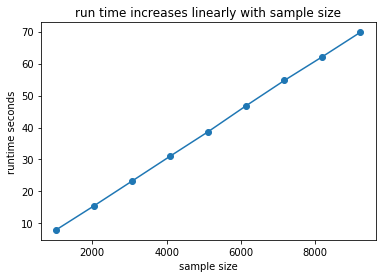

In [113]:
import matplotlib.pyplot as plt
plt.plot(sample_n_list, run_times, marker = "o")
plt.title("run time increases linearly with sample size")
plt.xlabel("sample size")
plt.ylabel("runtime seconds")
plt.show()